In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [346]:
df = pd.read_csv('Estimate_SkewnessEntropy_of_change_exposure_data.csv')
df.head()
# print(df.to_string())


,image-id,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,OverExposed,...,Green.2,Green.3,Blue,Blue.1,Blue.2,Blue.3,Gray,Gray.1,Gray.2,Gray.3
0,image-id,Red,Red,Green,Green,Blue,Blue,Gray,Gray,Red,...,Entropy,Entropy,Skewness,Skewness,Entropy,Entropy,Skewness,Skewness,Entropy,Entropy
1,image-id,Skewness,Entropy,Skewness,Entropy,Skewness,Entropy,Skewness,Entropy,Skewness,...,average,standard deviation,average,standard deviation,average,standard deviation,average,standard deviation,average,standard deviation
2,a0001-jmac_DSC1459_0.JPG,2.1019976,4.608174,1.3383546,4.8429666,1.419794,4.817762,1.419749,4.8107038,2.3556502,...,4.768222199999999,0.07231860956683263,3.0621671666666668,2.136483199872723,4.605453533333333,0.15172238008031497,1.4292442,0.14299105664490577,4.747433466666666,0.05463592003174793
3,a0002-dgw_005_0.JPG,0.54448247,5.3113976,0.40849414,5.263343,0.43431446,5.2690783,0.48259425,5.2673893,1.6277936,...,5.095923633333334,0.23812808276542155,0.9727829199999999,0.38188920912037755,5.115528333333334,0.26286409287706486,1.0995650833333332,0.5311506933568984,5.0935212666666665,0.21618219745076656
4,a0006-IMG_2787_0.JPG,0.5673284,4.9034314,0.5872545,4.977412,0.7045587,5.1611195,0.59423643,4.974805,2.327781,...,4.743220666666667,0.174217783463368,2.0997502666666663,1.2446998951640629,4.974347600000001,0.13613633531723493,1.5178110433333334,0.8467036348812512,4.744489333333333,0.1704502990440975


In [347]:
df.columns

Index(['image-id', 'Normal', 'Normal.1', 'Normal.2', 'Normal.3', 'Normal.4',
       'Normal.5', 'Normal.6', 'Normal.7', 'OverExposed', 'OverExposed.1',
       'OverExposed.2', 'OverExposed.3', 'OverExposed.4', 'OverExposed.5',
       'OverExposed.6', 'OverExposed.7', 'UnderExposed', 'UnderExposed.1',
       'UnderExposed.2', 'UnderExposed.3', 'UnderExposed.4', 'UnderExposed.5',
       'UnderExposed.6', 'UnderExposed.7', 'Red', 'Red.1', 'Red.2', 'Red.3',
       'Green', 'Green.1', 'Green.2', 'Green.3', 'Blue', 'Blue.1', 'Blue.2',
       'Blue.3', 'Gray', 'Gray.1', 'Gray.2', 'Gray.3'],
      dtype='object')

**------------Normal green image entropy and skewness-----------------**

**Skewness**

In [349]:
# Normal image
Green_Normal_skewness = df["Normal.2"][2:]
Green_Normal_skewness =  Green_Normal_skewness.astype(float)
ax =  np.arange(0,Green_Normal_skewness.count(),1)

# Overexposed iamge
Overexposed_skewness = df["OverExposed.2"][2:]
Overexposed_skewness =  Overexposed_skewness.astype(float)

#Underexposed image
Underexposed_skewness = df["UnderExposed.2"][2:]
Underexposed_skewness =  Underexposed_skewness.astype(float)

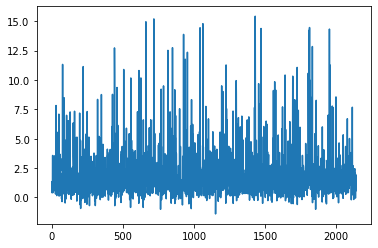

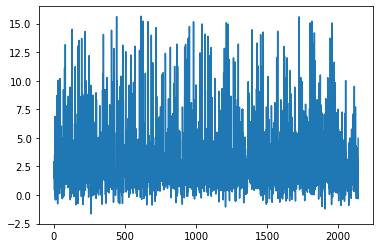

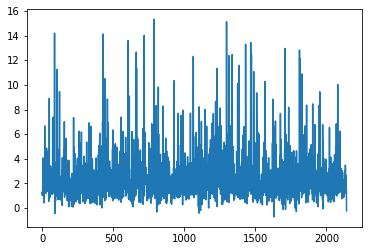

In [350]:
plt.plot(ax,Green_Normal_skewness)
plt.show()
plt.plot(ax,Overexposed_skewness)
plt.show()
plt.plot(ax,Underexposed_skewness)
plt.show()

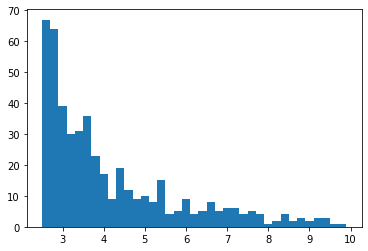

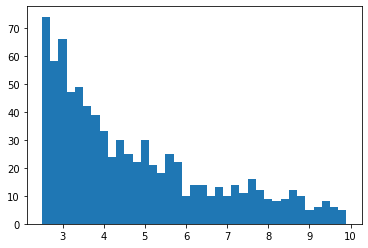

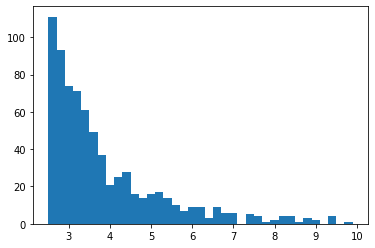

In [379]:


plt.hist(Green_Normal_skewness,np.arange(2.5,10,0.2))
plt.show()
plt.hist(Overexposed_skewness,np.arange(2.5,10,0.2))
plt.show()
plt.hist(Underexposed_skewness,np.arange(2.5,10,0.2))
plt.show()


**Entropy**

In [354]:
# Normal image
Green_Normal_entropy = df["Normal.3"][2:]
Green_Normal_entropy =  Green_Normal_entropy.astype(float)
ax =  np.arange(0,Green_Normal_entropy.count(),1)

# Overexposed iamge
Overexposed_entropy = df["OverExposed.3"][2:]
Overexposed_entropy =  Overexposed_entropy.astype(float)

#Underexposed image
Underexposed_entropy = df["UnderExposed.3"][2:]
Underexposed_entropy =  Underexposed_entropy.astype(float)


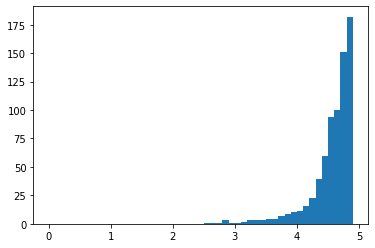

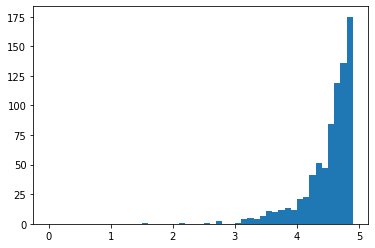

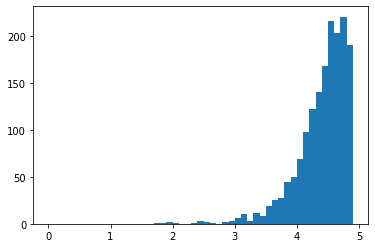

In [357]:
plt.hist(Green_Normal_entropy,np.arange(0,5,0.1))
plt.show()
plt.hist(Overexposed_entropy,np.arange(0,5,0.1))
plt.show()
plt.hist(Underexposed_entropy,np.arange(0,5,0.1))
plt.show()

**Load Model Prediction output**

**Normal Image detected as Normal**

In [358]:
Dir  = './Wrong-place/Normal/'
normal = pd.read_csv(Dir+'Normal.txt')
overexposed = pd.read_csv(Dir+'OverExposed.txt')
underexposed = pd.read_csv(Dir+'UnderExposed.txt')
normal.columns = ['image']  #add heading of image
overexposed.columns = ['image']  #add heading of image
underexposed.columns = ['image']  #add heading of image
image_id = df['image-id'][2:].str[:5]

**Find the similar index**

In [359]:
# make a broadcasted comparison
mat = normal['image'].values == df['image-id'].values[:, None]
# find the indices where the values are True
where = np.argwhere(mat)
index = where[:,0]
# select the values
# values = df['image-id'][where[:, 0]]
# print(where)
# print(where[:,0])

In [360]:
normal_img = df.loc[index]
print("Total image = %s "%len(normal_img))
normal_img.head()


Total image = 199 


,image-id,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,OverExposed,...,Green.2,Green.3,Blue,Blue.1,Blue.2,Blue.3,Gray,Gray.1,Gray.2,Gray.3
26,a0049-_I2E5952_0.JPG,1.3306348,4.900429,1.1959609,4.8511305,1.112726,4.788157,1.2508461,4.867041,3.3811522,...,4.661752866666666,0.18542745446940218,1.6568586666666667,0.4596457575433015,4.6290884,0.23840044645068656,1.8802995999999998,0.6362097771189364,4.672395566666667,0.1649430470957847
32,a0068-LS051026_day_1_arive53_0.JPG,5.6600647,5.2805552,7.822614,5.2521105,7.726835,5.2670517,5.4755797,5.265849,8.055634,...,5.077881633333334,0.12347921501533034,7.206401333333333,3.8357222535232594,5.135277899999999,0.13615584711604067,5.145599933333333,2.53819960726951,5.097769333333333,0.1230554337587559
35,a0076-jmac_MG_5736_0.JPG,1.1555077,5.197942,1.2236832,5.1344757,1.037253,5.071232,1.1817043,5.146799,2.045027,...,4.994691833333333,0.21079187149961198,2.781958433333333,1.4246238531524413,4.924724,0.1610681578466295,2.1922798333333335,0.7249140101691939,5.002859233333333,0.21079852937083995
41,a0085-kme_215_0.JPG,2.1744018,4.780057,2.1012022,4.766624,2.1236,4.7101774,2.1647327,4.7590046,4.2671328,...,4.534109,0.1826808638381884,2.9319553,1.5131099035723015,4.4876283,0.1970361256608713,2.876227333333333,1.3324564091155409,4.528942533333333,0.18274310451460402
50,a0100-AlexWed07-9691_0.JPG,0.4659653,4.9188395,0.42839468,4.9701767,1.3362956,4.882498,0.50809616,4.9316354,1.2265893,...,4.8142448,0.2882953502774888,1.9842896666666665,0.6158406988551738,4.763286999999999,0.3190152874460092,1.23781592,0.517584289218631,4.781851966666667,0.2965520359750302


In [367]:
# Normal image
Detected_green_Normal_skewness = normal_img["Normal.2"][:]
Detected_green_Normal_skewness =  Detected_green_Normal_skewness.astype(float)
ax =  np.arange(0,Detected_green_Normal_skewness.count(),1)

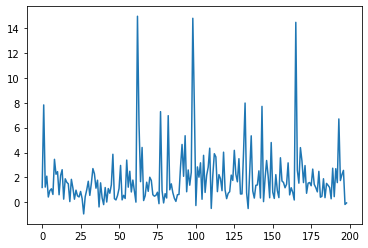

In [368]:
plt.plot(ax,Detected_green_Normal_skewness)
plt.show()

**Normal image but detected as overexposed**

In [369]:
# make a broadcasted comparison
mat = overexposed['image'].values == df['image-id'].values[:, None]
# find the indices where the values are True
where = np.argwhere(mat)
index = where[:,0]
# select the values
# values = df['image-id'][where[:, 0]]
# print(where)
print(where[:,0])

[ 934 1161 1175 1370 1376 1821]


In [370]:
overexposed_img = df.loc[index]
print("Total image = %s "%len(overexposed_img))
overexposed_img.head()

Total image = 6 


,image-id,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,OverExposed,...,Green.2,Green.3,Blue,Blue.1,Blue.2,Blue.3,Gray,Gray.1,Gray.2,Gray.3
934,a1895-kme_114_0.JPG,0.46160528,4.826983,0.5367674,4.791236,0.7264625,4.702248,0.5316521,4.7921596,2.8952487,...,4.485870566666667,0.5258084993829112,1.4719146,0.9404494532685634,4.4005301333333335,0.5326121853738442,1.3867685766666666,1.0532171186567552,4.487370366666667,0.5270731168253624
1161,a2380-20060208_203256__MG_2849_0.JPG,1.3021176,4.50629,1.3391248,4.614918,1.4874865,4.673078,1.3550206,4.5927496,2.9690685,...,4.313831033333334,0.415169588070115,2.2015664999999998,0.8160994527875672,4.368181233333334,0.4115385007844455,2.0490215333333333,0.8337004310564412,4.2869311,0.4214716538175967
1175,a2411-jmac_DSC1006_0.JPG,2.0422301,4.336164,1.5627952,4.5029435,1.555829,4.4796534,1.7444133,4.4446006,12.32152,...,4.333767566666666,0.34462441185561526,1.480206,0.26457724062172594,4.4373064,0.12994976359734842,2.1611816666666663,0.8736068800971535,4.2484534,0.40556702039385145
1370,a2822-jmac_MG_1389_0.JPG,5.71573,4.730751,5.083129,4.7755876,11.402709,4.8433304,5.047693,4.8216286,10.42895,...,4.572016166666667,0.7618873069785163,9.773000566666667,3.3582304192968317,4.6966143,0.5374381524739815,6.206725666666667,2.2742807993211587,4.630265966666666,0.7220268337223871
1376,a2837-07-12-02-at-11h35m49s-_MG_8848_0.JPG,3.558062,4.5193973,3.6445863,4.5197487,4.036477,4.5210314,3.6387923,4.517045,8.686236,...,4.299335,0.9021334140669254,4.8338540666666665,2.8652186851253796,4.3127316,0.8907271567178957,4.654929566666667,2.950595220168166,4.297074066666667,0.9007376085390106


In [371]:
# Normal image
Detected_green_Overexposed_skewness = overexposed_img["OverExposed.2"]
Detected_green_Overexposed_skewness =  Detected_green_Overexposed_skewness.astype(float)
ax =  np.arange(0,Detected_green_Overexposed_skewness.count(),1)
print(ax)

[0 1 2 3 4 5]


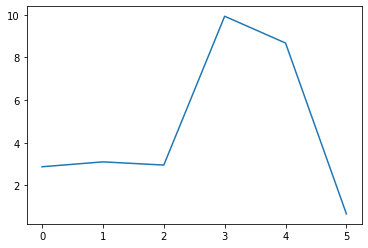

In [372]:
plt.plot(ax,Detected_green_Overexposed_skewness)
plt.show()

**Normal image but detected as Underexposed**

In [375]:
# make a broadcasted comparison
mat = underexposed['image'].values == df['image-id'].values[:, None]
# find the indices where the values are True
where = np.argwhere(mat)
index = where[:,0]
# select the values
# values = df['image-id'][where[:, 0]]
# print(where)
print(where[:,0])

[   5    6    9   20   39   85  112  131  141  142  163  171  172  202
  234  252  261  262  289  298  300  305  306  312  333  350  356  369
  388  391  398  424  440  462  491  501  517  534  580  595  596  613
  633  636  675  680  709  733  789  793  860  914  915  920  939 1034
 1076 1077 1094 1103 1104 1121 1131 1179 1200 1222 1225 1229 1234 1273
 1300 1301 1305 1319 1333 1371 1389 1392 1408 1410 1489 1508 1586 1595
 1627 1639 1647 1690 1716 1750 1759 1771 1789 1848 1850 1852 1862 1865
 1923 1939 1950 1951 1954 1969 1994 1999 2027 2060 2069 2085 2088 2089
 2091 2105 2108 2122]


In [376]:
underexposed_img = df.loc[index]
print("Total image = %s "%len(underexposed_img))
underexposed_img.head()

Total image = 116 


,image-id,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,OverExposed,...,Green.2,Green.3,Blue,Blue.1,Blue.2,Blue.3,Gray,Gray.1,Gray.2,Gray.3
5,a0007-IMG_2480_0.JPG,0.35935497,5.196602,0.45196876,5.20235,0.664799,5.2212048,0.4477783,5.196538,2.8890507,...,5.0012,0.15728375928874533,1.8022019,1.0358729321883098,5.022415766666666,0.15735147885283912,1.5420105333333334,1.0458740038580376,4.9944435,0.15775862699442694
6,a0008-WP_CRW_3959_0.JPG,0.8491604,4.864385,0.9039519,4.736558,2.858573,4.444159,0.99266016,4.7403307,1.7792646,...,4.6346538,0.3723542083000359,3.4179894333333336,0.4761306429351392,4.371736666666667,0.37434771389010635,1.5830586199999999,0.4176980729918053,4.634454233333334,0.36149869586704686
9,a0011-DSC_0082_0.JPG,0.5627613,4.84314,0.4017716,4.83835,0.3698581,4.9646535,0.42386627,4.833616,-0.28721496,...,4.751580633333333,0.4219952948611502,0.42884800000000006,0.8914800130519174,4.8804234,0.4137065473446364,0.6193007333333334,0.6855362508414199,4.748525399999999,0.4249868249048277
20,a0041-IMG_4972_0.JPG,3.5869563,4.724756,3.5379992,4.538183,3.256729,4.4768076,3.872859,4.6157327,1.8084989,...,4.523370066666668,0.5091887888768524,4.491223066666667,2.444152698299701,4.4508661,0.44152643059414537,4.272348,2.0559613076120864,4.5884691,0.4836980504472599
39,a0083-jmac_MG_0082_0.JPG,2.4921594,5.005829,3.2175736,4.9292865,3.2633047,4.9013114,3.1082506,4.935295,1.2018517,...,4.890525433333333,0.3359310054088121,2.730322166666667,0.6873242322406039,4.863925133333333,0.31983785021560884,2.7642621999999997,0.7901751910987503,4.889288533333334,0.34293838917543534


In [377]:
# Normal image
Detected_green_normal_underexposed_skewness = underexposed_img["UnderExposed.2"][:]
Detected_green_normal_underexposed_skewness =  Detected_green_normal_underexposed_skewness.astype(float)
ax =  np.arange(0,Detected_green_normal_underexposed_skewness.count(),1)
print(ax)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115]


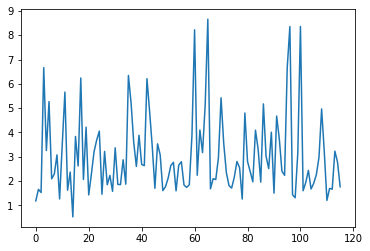

In [378]:
plt.plot(ax,Detected_green_normal_underexposed_skewness)
plt.show()